# IMAGE PROCESSING USING GPT-40,CLAUDE-3-OPUS,GEMINI-PRO

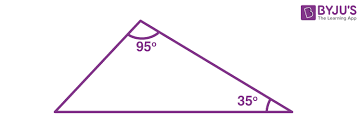

Checking how all the models compare when given the same image and same prompts to calculate the missing angle of the image

## Correct Answer : 50 DEGREES

| Model          | Predicted Values  |
|----------------|-------------------|
| ChatGPT-4o    | 50 |
| Claude3-Opus    | 48 |
| Gemini-Pro     | 60 |


In [62]:
!pip install anthropic --quiet
!pip install portkey-ai --quiet

# OPENAI GPT-4o

In [63]:
from openai import OpenAI
from portkey_ai import PORTKEY_GATEWAY_URL, createHeaders
from google.colab import userdata

In [64]:
portkey = OpenAI(
    api_key= userdata.get('OPENAI_API_KEY'), ## replace it your OpenAI API key
    base_url=PORTKEY_GATEWAY_URL,
    default_headers=createHeaders(
        provider="openai",
        api_key= userdata.get('PORTKEY_API_KEY'), ## replace it your Portkey API key
    )
)

In [65]:
## URL Image Processing

img_url = "data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAWkAAACMCAMAAACJW6j5AAAAyVBMVEX///93GoB+Kobl1+bu5e+BNYl9K4V7JoN6I4N+Lob79/t5IIL9+/3y7vPj2uV7JIOeW6F0JX6UWZvfz+GFO4zcyt7Ns9DCo8a1j7rn2+lxAHqOTJWug7OicKiIQZD09PSeaaS0tLaaYqDXw9moeq1yAHu7mL/HqsrMzM2yirfPuNK0jrmNSpTUvdbV1tbq6uvBwcLIuMygh6eBW4tfLW1dPWtfH2uKdJSTf5yvnLZ6M4NXF2VvVny4q71yTX6sra6enqGTlJaAgoSTor3kAAAJH0lEQVR4nO2dC3ubOBaGJYwkhGDVAQzmam6BmODL7GV2d2Zn0+7//1ErnCZxHbtxW7uArfdpYhtIopwqn875kGQAJBKJRCK5GvRd+m7MFWMsPuzSAOAtFgvPBHrdhX06FZ8mBTBqE3SfjEoFfvWwNPpu9/gwAyrAhBPcPVrARAQrMNGnQSXOolBcY1FgB56I+F0tHn0GYRD13e7xYUKEsFPOvMqiCFHLMJ3UNN2gAZbigwguxTWW8znSsJ4G0wdWmAto9t3w0SEijWe//vVvf//HEn2OdAzA8q4BUxhPWdxd8xppT4/BA3TFl/Xd7vEhIk2a3zFFv/0zps+RtnAuTkUEaWp3zU6kxSuVQmvZb6NHybZPp51w/Ct/iXQOHTESmi3zttd8GWmgewiWvTZ6lIhI03yBEfrt3w1+UQ8DteLcjJtgKUL+wQF+MAOgeIq0OF0Gdq+tHiPdiEg90ad//+M/LqE52EYaJEjkeA+aCRwF6KwFJrN0UAZdzuekBnCDuu+Gj44u0sQLxWiI/vjToSLLc1CSQNilcQuoggoKxBA46x6t7ivKQEuYIofEb2XbpyMxGAr9+DMR6gHKMAzzbZctUtGxayt3uxdNnldP9UodJqnfY5NHShdplLgEUfLfJekifQKyQvwOtpEmLkV5tXS6EdHIHler7an1+vWy+er5Sfbz23gdbCNNo6VbpXhbuYB1Nv+YzbN7sLoH99l8c39/v8lW4mOdZQbIPs7Fs00277vho2MbaUQTgin6HOnNfLN5zDIR6fmnzf3mU2ZkqywTHysR3/9l2eP8cSP+FwaGvhz4IK2Hv+zAHjqhMFardbYC60fRm9ebjeja69Xqfr3OPs3X9/PNx2z1cXB9Wreg4/bdiK8z/8suXx3r7p868mr7b1gYOcaY5TIlujgxgQ85xMqDvJdxWWLCZgC4CiFO03dbrpoF17aWlx5Byi0pIRdjwcizt+iHDMOFrKwugwdJ/hpblyoESwm5BB7E+W4nNiNCoZSQ89MwbO3VLLbFMZzJLOS8NBCHb4tD15FZyJmZctqqB46bEcdMervnw2bUORTo7lROqVJJCTkPPqJ0cuzkFCPMW3kX/xyIQKNjAqHPFJo8cKxJCflx1JYi5B6sUow64cSZgonFMJZZyA9itpQolLfeG6FWvUSkedE2JamxyEKkhPwIukVh41sQE2x59ku31W3PEoeg9azfZgmpZh0ZNiXvY1gYdjfw7Rhq3UxZZMUCC3WTZjUY746Tk4TR7haH5LvICauenplNTjSNky1c05S02RfmmmFCpYR8F0+G9At+4UVdn4684mCqoZeMwlxKyLcTaeQb58pPQlE0VtJO/UYeXg3pZ4qqy0EMr+NwMVOLQiYpLt+4a6JiON7rnWXgKNAHesAgvHPBJI7fToY1IwXDWErI6ewb0gIbRrpKcqAGtar6pkGLKTxQr0wtDXPphZyKSCTy/WBVgcgsUgam0FZFp1UVAPihodGoRRooJeQ0lhC3bwzpuptDH2qqqyUBKw3g1C4/PPqZJcNaLL2Q91keNKRVBS1SQtRamdmpqGjURXRUj+2QYSol5D1shSqHYmhbSpxrajff2H9acPYVaoUQaad+HZtSfijQRrcOOySgKAygsneXO3VeCE9lFnIcFVF4MFn2Yao3MALpnatHwQkzIe1WFOjVudt3NagOhUfWjC3uYJDowCcBvNtPAQ9Ta5g4Mgs5iJlQeDQ0trsVXmPpnrp+z9x6IQOfdN0LZovZeYcxuyUYSi9kHyPH7OyLID0svZB9jJxo3vm/rRpzzKQXsktJ+Oz9q76Dacix4slC5plS44sLfWvDQ0QLpYQ8ccCQPiNqqWGtlBICLh1o8GSnUk9mIQcM6XNjeBRr4fSyP2TweAyftpz9h1C7eSG3nYU0nCY/pZKzHX7TErLUKP1ZOVgFMWlvVUKOGdKXwYwhhfFNeiETftiQvhjThGB4gxLiI6ocnYp+ISqKeXJrEqIiqv38TczUmFNY3pSEqC1WeqmSi5BjcgE/a6joLdZ6uq9qVLdUyOgWJv3tyqfG7Ga8kJywXv+Ai5YTdAtZSEx4z/eu9UrB3Lp6CYn5xQzp01FjUTReuYRE2oV90hMpks4L6bsVF2TGSNp3G54wKnbNhUylbbcaHwZqCimLr/NGYw1x0ncbdikQwdo1bgPtMhoOrAtVHLP26jY3Lxh1Bmc6qKl2dV5IodBkiHnVMiEY11dUyEzo8Z0k+kWvKGbW1UjIBFH0sw3pk/FjDbMrkRDVwXjIueuyFYXMNWQhaoLpkAPdSYhI+Mbvhegh5oPfek0UMphH45YQEWgy8M26txTdzkOjlpAcs3Gs8dEr0a1HnIW87o0yfDovRBtrFlISNqa3tywowcooJaTkfEyBBsCYieQ6GWzuf5SZNhRD+nT8fIReSMXIe4u9h8jSGZuE1BxbA/NJT0OfKaPyQmptpIEW+KmQ68VIJGSJcThEn/REmlYUMmOouEBB8CAN6QOY06Jrqdq9m9Nrk7t5ISwffhZiU+oM05B+g+0EgdIAkAaCVLxuPqtGJyFk6F6IjykdSaCNkNoTBAForcZ1C1BZi5d1IU1CCBp0FqIiSscydJuxB0AemABu11UbyAT5y1xYc8apZg1XQkxMtTGZvb5LU6AHuYNKHbRT4Ow0fooRJdFAcyg9oWfesuPC5AF3wSRQvByWYoSBuwbCDFOHKGiYWUhC4TAbdgxzEgYq8E1gJGhvADQRjsACUi0cnoQYFu53hvQ3onp2t7K60VVD5B/7a/dqDrvdJy0mevrQJGRMhnSHGuQGSO/8OqiAr1h7Z0P85Nw0DhnaO6yVRBvZlvIldBwYA53CluzvveVj9vmIvlDwoN5hLeLauAxpIXdNHHfjilml0b4Ye/x1I1U/5xguhiIhD5wPYir6uUi/sH3drpAZhoRUg5mKfh70ln9RIZoLPgwvxOMkHcpf11kQMr1XgU1yhknvdqrL6GgN6cNM2Ns93JuEkqTfeqHhyCn8yRXhVwS9PTj9gBDv893mVYgQospVQRHChw6KXxT2Z76r8Lbo8TaHrt4SfQ+KEolEIpFIJBKJRCKRSCQSiUQikUgkEolEIpFIJBKJRPLD/B8tlaiKrWBL7AAAAABJRU5ErkJggg=="

response = portkey.chat.completions.create(
    model="gpt-4o",
    messages=[
        {"role": "system", "content": "You are a helpful assistant that responds in Markdown. Help me with my math homework!"},
        {"role": "user", "content": [
            {"type": "text", "text": "Find the 3rd angle of the triangle"},
            {"type": "image_url", "image_url": {
                "url": img_url}
            }
        ]}
    ],
    temperature=0.0,
)


In [66]:

print(response.choices[0].message.content)

To find the third angle of a triangle, you can use the fact that the sum of the angles in a triangle is always 180 degrees.

Given:
- First angle = 95°
- Second angle = 35°

Let's denote the third angle as \( x \).

Using the sum of angles in a triangle:
\[ 95° + 35° + x = 180° \]

Now, solve for \( x \):
\[ 130° + x = 180° \]
\[ x = 180° - 130° \]
\[ x = 50° \]

So, the third angle of the triangle is \( 50° \).


# ANTHROPIC CLAUDE 3 OPUS

In [67]:
from anthropic import Anthropic
from portkey_ai import PORTKEY_GATEWAY_URL, createHeaders

client = Anthropic(
    api_key="ANTHROPIC_API_KEY",
    base_url=PORTKEY_GATEWAY_URL,
    default_headers=createHeaders(
        api_key="PORTKEY_API_KEY",
        provider="anthropic"
    )
)

In [68]:
client = Anthropic(
    api_key= userdata.get('ANTHROPIC_API_KEY'), ## replace it your OpenAI API key
    base_url=PORTKEY_GATEWAY_URL,
    default_headers=createHeaders(
        provider="anthropic",
        api_key= userdata.get('PORTKEY_API_KEY'), ## replace it your Portkey API key
    )
)

In [69]:
# message = client.messages.create(
#     messages= [{ "role": 'user', "content": 'Say this is a test' }],
#     model= 'claude-3-opus-20240229',
#     max_tokens=250
# )

# print(message.content)

In [70]:
img_url = "data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAWkAAACMCAMAAACJW6j5AAAAyVBMVEX///93GoB+Kobl1+bu5e+BNYl9K4V7JoN6I4N+Lob79/t5IIL9+/3y7vPj2uV7JIOeW6F0JX6UWZvfz+GFO4zcyt7Ns9DCo8a1j7rn2+lxAHqOTJWug7OicKiIQZD09PSeaaS0tLaaYqDXw9moeq1yAHu7mL/HqsrMzM2yirfPuNK0jrmNSpTUvdbV1tbq6uvBwcLIuMygh6eBW4tfLW1dPWtfH2uKdJSTf5yvnLZ6M4NXF2VvVny4q71yTX6sra6enqGTlJaAgoSTor3kAAAJH0lEQVR4nO2dC3ubOBaGJYwkhGDVAQzmam6BmODL7GV2d2Zn0+7//1ErnCZxHbtxW7uArfdpYhtIopwqn875kGQAJBKJRCK5GvRd+m7MFWMsPuzSAOAtFgvPBHrdhX06FZ8mBTBqE3SfjEoFfvWwNPpu9/gwAyrAhBPcPVrARAQrMNGnQSXOolBcY1FgB56I+F0tHn0GYRD13e7xYUKEsFPOvMqiCFHLMJ3UNN2gAZbigwguxTWW8znSsJ4G0wdWmAto9t3w0SEijWe//vVvf//HEn2OdAzA8q4BUxhPWdxd8xppT4/BA3TFl/Xd7vEhIk2a3zFFv/0zps+RtnAuTkUEaWp3zU6kxSuVQmvZb6NHybZPp51w/Ct/iXQOHTESmi3zttd8GWmgewiWvTZ6lIhI03yBEfrt3w1+UQ8DteLcjJtgKUL+wQF+MAOgeIq0OF0Gdq+tHiPdiEg90ad//+M/LqE52EYaJEjkeA+aCRwF6KwFJrN0UAZdzuekBnCDuu+Gj44u0sQLxWiI/vjToSLLc1CSQNilcQuoggoKxBA46x6t7ivKQEuYIofEb2XbpyMxGAr9+DMR6gHKMAzzbZctUtGxayt3uxdNnldP9UodJqnfY5NHShdplLgEUfLfJekifQKyQvwOtpEmLkV5tXS6EdHIHler7an1+vWy+er5Sfbz23gdbCNNo6VbpXhbuYB1Nv+YzbN7sLoH99l8c39/v8lW4mOdZQbIPs7Fs00277vho2MbaUQTgin6HOnNfLN5zDIR6fmnzf3mU2ZkqywTHysR3/9l2eP8cSP+FwaGvhz4IK2Hv+zAHjqhMFardbYC60fRm9ebjeja69Xqfr3OPs3X9/PNx2z1cXB9Wreg4/bdiK8z/8suXx3r7p868mr7b1gYOcaY5TIlujgxgQ85xMqDvJdxWWLCZgC4CiFO03dbrpoF17aWlx5Byi0pIRdjwcizt+iHDMOFrKwugwdJ/hpblyoESwm5BB7E+W4nNiNCoZSQ89MwbO3VLLbFMZzJLOS8NBCHb4tD15FZyJmZctqqB46bEcdMervnw2bUORTo7lROqVJJCTkPPqJ0cuzkFCPMW3kX/xyIQKNjAqHPFJo8cKxJCflx1JYi5B6sUow64cSZgonFMJZZyA9itpQolLfeG6FWvUSkedE2JamxyEKkhPwIukVh41sQE2x59ku31W3PEoeg9azfZgmpZh0ZNiXvY1gYdjfw7Rhq3UxZZMUCC3WTZjUY746Tk4TR7haH5LvICauenplNTjSNky1c05S02RfmmmFCpYR8F0+G9At+4UVdn4684mCqoZeMwlxKyLcTaeQb58pPQlE0VtJO/UYeXg3pZ4qqy0EMr+NwMVOLQiYpLt+4a6JiON7rnWXgKNAHesAgvHPBJI7fToY1IwXDWErI6ewb0gIbRrpKcqAGtar6pkGLKTxQr0wtDXPphZyKSCTy/WBVgcgsUgam0FZFp1UVAPihodGoRRooJeQ0lhC3bwzpuptDH2qqqyUBKw3g1C4/PPqZJcNaLL2Q91keNKRVBS1SQtRamdmpqGjURXRUj+2QYSol5D1shSqHYmhbSpxrajff2H9acPYVaoUQaad+HZtSfijQRrcOOySgKAygsneXO3VeCE9lFnIcFVF4MFn2Yao3MALpnatHwQkzIe1WFOjVudt3NagOhUfWjC3uYJDowCcBvNtPAQ9Ta5g4Mgs5iJlQeDQ0trsVXmPpnrp+z9x6IQOfdN0LZovZeYcxuyUYSi9kHyPH7OyLID0svZB9jJxo3vm/rRpzzKQXsktJ+Oz9q76Dacix4slC5plS44sLfWvDQ0QLpYQ8ccCQPiNqqWGtlBICLh1o8GSnUk9mIQcM6XNjeBRr4fSyP2TweAyftpz9h1C7eSG3nYU0nCY/pZKzHX7TErLUKP1ZOVgFMWlvVUKOGdKXwYwhhfFNeiETftiQvhjThGB4gxLiI6ocnYp+ISqKeXJrEqIiqv38TczUmFNY3pSEqC1WeqmSi5BjcgE/a6joLdZ6uq9qVLdUyOgWJv3tyqfG7Ga8kJywXv+Ai5YTdAtZSEx4z/eu9UrB3Lp6CYn5xQzp01FjUTReuYRE2oV90hMpks4L6bsVF2TGSNp3G54wKnbNhUylbbcaHwZqCimLr/NGYw1x0ncbdikQwdo1bgPtMhoOrAtVHLP26jY3Lxh1Bmc6qKl2dV5IodBkiHnVMiEY11dUyEzo8Z0k+kWvKGbW1UjIBFH0sw3pk/FjDbMrkRDVwXjIueuyFYXMNWQhaoLpkAPdSYhI+Mbvhegh5oPfek0UMphH45YQEWgy8M26txTdzkOjlpAcs3Gs8dEr0a1HnIW87o0yfDovRBtrFlISNqa3tywowcooJaTkfEyBBsCYieQ6GWzuf5SZNhRD+nT8fIReSMXIe4u9h8jSGZuE1BxbA/NJT0OfKaPyQmptpIEW+KmQ68VIJGSJcThEn/REmlYUMmOouEBB8CAN6QOY06Jrqdq9m9Nrk7t5ISwffhZiU+oM05B+g+0EgdIAkAaCVLxuPqtGJyFk6F6IjykdSaCNkNoTBAForcZ1C1BZi5d1IU1CCBp0FqIiSscydJuxB0AemABu11UbyAT5y1xYc8apZg1XQkxMtTGZvb5LU6AHuYNKHbRT4Ow0fooRJdFAcyg9oWfesuPC5AF3wSRQvByWYoSBuwbCDFOHKGiYWUhC4TAbdgxzEgYq8E1gJGhvADQRjsACUi0cnoQYFu53hvQ3onp2t7K60VVD5B/7a/dqDrvdJy0mevrQJGRMhnSHGuQGSO/8OqiAr1h7Z0P85Nw0DhnaO6yVRBvZlvIldBwYA53CluzvveVj9vmIvlDwoN5hLeLauAxpIXdNHHfjilml0b4Ye/x1I1U/5xguhiIhD5wPYir6uUi/sH3drpAZhoRUg5mKfh70ln9RIZoLPgwvxOMkHcpf11kQMr1XgU1yhknvdqrL6GgN6cNM2Ns93JuEkqTfeqHhyCn8yRXhVwS9PTj9gBDv893mVYgQospVQRHChw6KXxT2Z76r8Lbo8TaHrt4SfQ+KEolEIpFIJBKJRCKRSCQSiUQikUgkEolEIpFIJBKJRPLD/B8tlaiKrWBL7AAAAABJRU5ErkJggg=="

response = client.messages.create(
    system="You are a helpful assistant that responds in Markdown. Help me with my math homework!",
    messages=[
        {"role": "user", "content": "Find the 3rd angle of the triangle"},
        {"role": "assistant", "content": "Sure, let's proceed with finding the third angle."},  # New assistant message
        {"role": "user", "content": f"Image URL: {img_url}"}
    ],
    model="claude-3-opus-20240229",
    max_tokens=250,
)

content = response.content[0].text

# Printing the content in a legible way
print(content)


To find the third angle of the triangle, we can use the fact that the sum of all angles in a triangle is always 180°.

Given:
- Angle 1 = 90°
- Angle 2 = 42°

Let's call the third angle x.

Using the triangle angle sum property:
Angle 1 + Angle 2 + x = 180°

Substituting the known values:
90° + 42° + x = 180°

Simplifying:
132° + x = 180°

Subtracting 132° from both sides:
x = 180° - 132°
x = 48°

Therefore, the measure of the third angle in the triangle is 48°.


# GOOGLE GEMINI-PRO

In [71]:
from portkey_ai import Portkey

portkey = Portkey(
    api_key= userdata.get('PORTKEY_API_KEY'),  # Replace with your Portkey API key
    virtual_key=userdata.get('VIRTUAL_GOOGLE_KEY')   # Replace with your virtual key for Google
)

In [73]:
# completion = portkey.chat.completions.create(
#     messages= [{ "role": 'user', "content": 'Say this is a test' }],
#     model= 'gemini-pro'
# )

# print(completion)

In [74]:
import json
img_url = "data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAWkAAACMCAMAAACJW6j5AAAAyVBMVEX///93GoB+Kobl1+bu5e+BNYl9K4V7JoN6I4N+Lob79/t5IIL9+/3y7vPj2uV7JIOeW6F0JX6UWZvfz+GFO4zcyt7Ns9DCo8a1j7rn2+lxAHqOTJWug7OicKiIQZD09PSeaaS0tLaaYqDXw9moeq1yAHu7mL/HqsrMzM2yirfPuNK0jrmNSpTUvdbV1tbq6uvBwcLIuMygh6eBW4tfLW1dPWtfH2uKdJSTf5yvnLZ6M4NXF2VvVny4q71yTX6sra6enqGTlJaAgoSTor3kAAAJH0lEQVR4nO2dC3ubOBaGJYwkhGDVAQzmam6BmODL7GV2d2Zn0+7//1ErnCZxHbtxW7uArfdpYhtIopwqn875kGQAJBKJRCK5GvRd+m7MFWMsPuzSAOAtFgvPBHrdhX06FZ8mBTBqE3SfjEoFfvWwNPpu9/gwAyrAhBPcPVrARAQrMNGnQSXOolBcY1FgB56I+F0tHn0GYRD13e7xYUKEsFPOvMqiCFHLMJ3UNN2gAZbigwguxTWW8znSsJ4G0wdWmAto9t3w0SEijWe//vVvf//HEn2OdAzA8q4BUxhPWdxd8xppT4/BA3TFl/Xd7vEhIk2a3zFFv/0zps+RtnAuTkUEaWp3zU6kxSuVQmvZb6NHybZPp51w/Ct/iXQOHTESmi3zttd8GWmgewiWvTZ6lIhI03yBEfrt3w1+UQ8DteLcjJtgKUL+wQF+MAOgeIq0OF0Gdq+tHiPdiEg90ad//+M/LqE52EYaJEjkeA+aCRwF6KwFJrN0UAZdzuekBnCDuu+Gj44u0sQLxWiI/vjToSLLc1CSQNilcQuoggoKxBA46x6t7ivKQEuYIofEb2XbpyMxGAr9+DMR6gHKMAzzbZctUtGxayt3uxdNnldP9UodJqnfY5NHShdplLgEUfLfJekifQKyQvwOtpEmLkV5tXS6EdHIHler7an1+vWy+er5Sfbz23gdbCNNo6VbpXhbuYB1Nv+YzbN7sLoH99l8c39/v8lW4mOdZQbIPs7Fs00277vho2MbaUQTgin6HOnNfLN5zDIR6fmnzf3mU2ZkqywTHysR3/9l2eP8cSP+FwaGvhz4IK2Hv+zAHjqhMFardbYC60fRm9ebjeja69Xqfr3OPs3X9/PNx2z1cXB9Wreg4/bdiK8z/8suXx3r7p868mr7b1gYOcaY5TIlujgxgQ85xMqDvJdxWWLCZgC4CiFO03dbrpoF17aWlx5Byi0pIRdjwcizt+iHDMOFrKwugwdJ/hpblyoESwm5BB7E+W4nNiNCoZSQ89MwbO3VLLbFMZzJLOS8NBCHb4tD15FZyJmZctqqB46bEcdMervnw2bUORTo7lROqVJJCTkPPqJ0cuzkFCPMW3kX/xyIQKNjAqHPFJo8cKxJCflx1JYi5B6sUow64cSZgonFMJZZyA9itpQolLfeG6FWvUSkedE2JamxyEKkhPwIukVh41sQE2x59ku31W3PEoeg9azfZgmpZh0ZNiXvY1gYdjfw7Rhq3UxZZMUCC3WTZjUY746Tk4TR7haH5LvICauenplNTjSNky1c05S02RfmmmFCpYR8F0+G9At+4UVdn4684mCqoZeMwlxKyLcTaeQb58pPQlE0VtJO/UYeXg3pZ4qqy0EMr+NwMVOLQiYpLt+4a6JiON7rnWXgKNAHesAgvHPBJI7fToY1IwXDWErI6ewb0gIbRrpKcqAGtar6pkGLKTxQr0wtDXPphZyKSCTy/WBVgcgsUgam0FZFp1UVAPihodGoRRooJeQ0lhC3bwzpuptDH2qqqyUBKw3g1C4/PPqZJcNaLL2Q91keNKRVBS1SQtRamdmpqGjURXRUj+2QYSol5D1shSqHYmhbSpxrajff2H9acPYVaoUQaad+HZtSfijQRrcOOySgKAygsneXO3VeCE9lFnIcFVF4MFn2Yao3MALpnatHwQkzIe1WFOjVudt3NagOhUfWjC3uYJDowCcBvNtPAQ9Ta5g4Mgs5iJlQeDQ0trsVXmPpnrp+z9x6IQOfdN0LZovZeYcxuyUYSi9kHyPH7OyLID0svZB9jJxo3vm/rRpzzKQXsktJ+Oz9q76Dacix4slC5plS44sLfWvDQ0QLpYQ8ccCQPiNqqWGtlBICLh1o8GSnUk9mIQcM6XNjeBRr4fSyP2TweAyftpz9h1C7eSG3nYU0nCY/pZKzHX7TErLUKP1ZOVgFMWlvVUKOGdKXwYwhhfFNeiETftiQvhjThGB4gxLiI6ocnYp+ISqKeXJrEqIiqv38TczUmFNY3pSEqC1WeqmSi5BjcgE/a6joLdZ6uq9qVLdUyOgWJv3tyqfG7Ga8kJywXv+Ai5YTdAtZSEx4z/eu9UrB3Lp6CYn5xQzp01FjUTReuYRE2oV90hMpks4L6bsVF2TGSNp3G54wKnbNhUylbbcaHwZqCimLr/NGYw1x0ncbdikQwdo1bgPtMhoOrAtVHLP26jY3Lxh1Bmc6qKl2dV5IodBkiHnVMiEY11dUyEzo8Z0k+kWvKGbW1UjIBFH0sw3pk/FjDbMrkRDVwXjIueuyFYXMNWQhaoLpkAPdSYhI+Mbvhegh5oPfek0UMphH45YQEWgy8M26txTdzkOjlpAcs3Gs8dEr0a1HnIW87o0yfDovRBtrFlISNqa3tywowcooJaTkfEyBBsCYieQ6GWzuf5SZNhRD+nT8fIReSMXIe4u9h8jSGZuE1BxbA/NJT0OfKaPyQmptpIEW+KmQ68VIJGSJcThEn/REmlYUMmOouEBB8CAN6QOY06Jrqdq9m9Nrk7t5ISwffhZiU+oM05B+g+0EgdIAkAaCVLxuPqtGJyFk6F6IjykdSaCNkNoTBAForcZ1C1BZi5d1IU1CCBp0FqIiSscydJuxB0AemABu11UbyAT5y1xYc8apZg1XQkxMtTGZvb5LU6AHuYNKHbRT4Ow0fooRJdFAcyg9oWfesuPC5AF3wSRQvByWYoSBuwbCDFOHKGiYWUhC4TAbdgxzEgYq8E1gJGhvADQRjsACUi0cnoQYFu53hvQ3onp2t7K60VVD5B/7a/dqDrvdJy0mevrQJGRMhnSHGuQGSO/8OqiAr1h7Z0P85Nw0DhnaO6yVRBvZlvIldBwYA53CluzvveVj9vmIvlDwoN5hLeLauAxpIXdNHHfjilml0b4Ye/x1I1U/5xguhiIhD5wPYir6uUi/sH3drpAZhoRUg5mKfh70ln9RIZoLPgwvxOMkHcpf11kQMr1XgU1yhknvdqrL6GgN6cNM2Ns93JuEkqTfeqHhyCn8yRXhVwS9PTj9gBDv893mVYgQospVQRHChw6KXxT2Z76r8Lbo8TaHrt4SfQ+KEolEIpFIJBKJRCKRSCQSiUQikUgkEolEIpFIJBKJRPLD/B8tlaiKrWBL7AAAAABJRU5ErkJggg=="

completions = portkey.chat.completions.create(
    messages=[
        {"role": "system", "content": "You are a helpful assistant that responds in Markdown. Help me with my math homework"},
        {"role": "user", "content": "Find the 3rd angle of the triangle"},
        {"role": "assistant", "content": "Sure, let's proceed with finding the third angle."},
        {"role": "user", "content": f"Image URL: {img_url}"}
    ],
    model='gemini-pro',
)
choice_object = completions.choices[0]

content = choice_object.message.content

# Printing the content in a legible way
print(content)

Given the triangle in the image, we can find the third angle using the angle sum property of a triangle. The angle sum property states that the sum of the interior angles of a triangle is always $180^\circ$.

In this triangle, we are given two angles: $50^\circ$ and $70^\circ$. Let's call the third angle $x$.

Using the angle sum property, we have:

``` 
50^\circ + 70^\circ + x = 180^\circ
```

```
120^\circ + x = 180^\circ
```

```
x = 180^\circ - 120^\circ
```

```
x = 60^\circ
```

Therefore, the third angle of the triangle is $60^\circ$.


# Observation

| Model          | Predicted Values  |
|----------------|-------------------|
| ChatGPT-4o    | 50 |
| Claude3-Opus    | 48 |
| Gemini-Pro     | 60 |
